<a href="https://colab.research.google.com/github/nugzar/mics-w207/blob/master/Nugzar_Nebieridze_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with simply "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Custom imports
# Note that there are Guassian blur filters available, for example in 
# scipy.ndimage.filters. You're welcome to experiment with those, but 
# you are likely to get the best results with the simplified version 
# I described above.
# I decided to play with scipy.ndimage.filters, so I am importing it 
import scipy.ndimage.filters

# Got approval in Slack to use accuracy_score
from sklearn.metrics import accuracy_score

# You can do this as a preprocessing step, or with the binarize argument
from sklearn.preprocessing import binarize


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

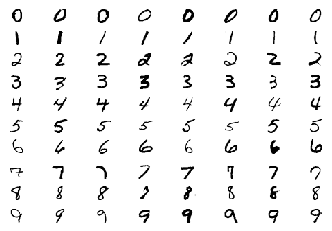

In [3]:
def P1(num_examples=10):
  # X is always 10 as we have only 10 digits (0...9)
  # Y is equal to num_examples
  fig, ax = plt.subplots(10, num_examples)
  [axi.set_axis_off() for axi in ax.ravel()]
  
  for digit in range(0,10):
    digit_indexes = [index for index, value in enumerate(mini_train_labels) 
                     if value == str(digit)]
    img_column = 0
    for index in digit_indexes[:num_examples]:
      ax[digit,img_column].imshow(mini_train_data[index].reshape((28,28)), 
                                  cmap='Greys', interpolation='nearest')
      img_column = img_column + 1
      
P1(8)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [ ]:
def P2(k_values):

  for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    
    expected = dev_labels
    predicted = model.predict(dev_data)

    print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(expected, predicted)))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

ANSWER: "8" has lowest f1-score. Therefore, the most difficult digit is "8"

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [ ]:
def P3(train_sizes, accuracies):
  
  # We will use full train dataset instead of mini train data
  # as mini train data does not contain 25,000 values

  for train_size in train_sizes:
    trainset_data = train_data[:train_size]
    trainset_labels = train_labels[:train_size]
    
    starttime = time.time()
    
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(trainset_data, trainset_labels)

    traintime = time.time()
    
    expected = dev_labels
    predicted = model.predict(dev_data)
    
    endtime = time.time()
    
    accuracies.append(accuracy_score(expected, predicted))
    
    print ("Train size: %d, training time: %.2f sec, prediction time: %.2f sec" % (train_size, traintime - starttime, endtime - traintime))
  
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

print ("Accuracies:", accuracies)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [ ]:
def P4():

  train_labels_v = [int(x) for x in train_labels]
  expected_v = [int(x) for x in dev_labels]
  
  model = LinearRegression()
  model.fit(train_data, train_labels)
  
  predicted = model.predict(dev_data)
  predicted_v = [int(x.round()) for x in predicted]
  
  print ("%.2f" % (accuracy_score(expected_v, predicted_v)))
  
P4()


ANSWER: The data is not linearly separable. This problem is NP-hard. But I am not sure why I have only 0.23 accuracy. May be I am doing something wrong

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'):
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

Actual count: [106, 118, 106, 97, 92, 88, 102, 102, 94, 95]
Mismatches  : [5, 2, 22, 13, 14, 11, 8, 6, 22, 13]
Matches     : [101, 116, 84, 84, 78, 77, 94, 96, 72, 82]
Accuracy    : [0.9528301886792453, 0.9830508474576272, 0.7924528301886793, 0.865979381443299, 0.8478260869565217, 0.875, 0.9215686274509803, 0.9411764705882353, 0.7659574468085106,

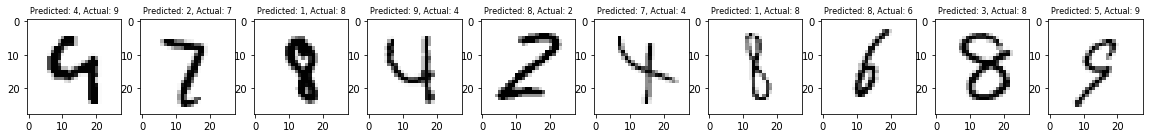

In [4]:
def P5():

  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(mini_train_data, mini_train_labels)
    
  expected = dev_labels
  predicted = model.predict(dev_data)

  cm = confusion_matrix(expected, predicted)
  
  counts_actual = []
  counts_false = []
  counts_true = []
  counts_score = []
  
  for i in range(10):
    counts_actual.append(len([x for x in expected if x == str(i)]))
    counts_false.append(sum(cm[i]) - cm[i][i])
    counts_true.append(cm[i][i])
    counts_score.append(counts_true[i] / counts_actual[i])
  
  
  print("Confusion Matrix for classifier %s:\n%s\n" % (model, cm))
  print("Actual count:", counts_actual)
  print("Mismatches  :", counts_false)
  print("Matches     :", counts_true)
  print("Accuracy    :", counts_score)
  
  # Let's take first 10 mismatched index
  mismatched_indexes = [i for i, t in enumerate(zip(predicted, expected)) 
                        if t[0] != t[1]][:10]
  print ("\n\nMismatched indexes:", mismatched_indexes)
  print ("Mismatched images:")
  
  plt.figure(figsize=(20,4))
  for i, image_index in enumerate(mismatched_indexes):
    plt.subplot(1, len(mismatched_indexes), i + 1)
    plt.imshow(dev_data[image_index].reshape((28,28)), cmap='Greys', interpolation='nearest')
    plt.title("Predicted: {0}, Actual: {1}".format(predicted[image_index], expected[image_index]), fontsize = 8)

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [ ]:
def P6():
    
  # 8 neighbouring values mean that we have 9 pixels
  # therefore, the width = 9
  # as whe width formula is:
  # w = 2*int(truncate*sigma + 0.5) + 1
  # (w - 1)/2 = int(truncate*sigma + 0.5)
  # then id w == 9 then
  # (9 - 1)/2 = 4 = int(truncate*sigma + 0.5)
  # by removing int() we will get the range:
  # 4 =< truncate*sigma + 0.5 < 5
  # 3.5 =< truncate*sigma < 4.5
  # by default, truncate = 4.0, therefore
  # 0.875 =< sigma < 1.125
  
  # As: 0.875 =< sigma < 1.125
  sigma = 1
  k = 1
  
  # Option 1: preprocess the training data but not the dev data
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(
      scipy.ndimage.filters.gaussian_filter(mini_train_data, sigma, truncate=4),
      mini_train_labels)
  print("Option 1. Accuracy: %.2f" % 
        accuracy_score(dev_labels, model.predict(dev_data)))

  # Option 2: preprocess the dev data but not the training data
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(mini_train_data, mini_train_labels)
  print("Option 2. Accuracy: %.2f" % accuracy_score(dev_labels, 
    model.predict(scipy.ndimage.filters.gaussian_filter(dev_data, sigma, truncate=4))))

  # Option 3: preprocess both training and dev data
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(
      scipy.ndimage.filters.gaussian_filter(mini_train_data, sigma, truncate=4), 
      mini_train_labels)
  print("Option 3. Accuracy: %.2f" % accuracy_score(dev_labels, 
    model.predict(scipy.ndimage.filters.gaussian_filter(dev_data, sigma, truncate=4))))
  
  # Just visualizing the blurred images
  data = scipy.ndimage.filters.gaussian_filter(dev_data, 1, truncate=4)
  
  for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[i].reshape((28,28)), cmap='Greys', interpolation='nearest')

P6()

ANSWER:<br />
Option 1. Accuracy: 0.77<br />
Option 2. Accuracy: 0.55<br />
Option 3. Accuracy: 0.47<br />
<br />

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [ ]:
def CONVERT_012(a):
  arr_1 = np.where(a < 0.33, 0, a)
  arr_2 = np.where(arr_1 > 0.66, 2, arr_1)
  return np.where((arr_2 > 0) & (arr_2 < 2), 1, arr_2)

def P7():
  
  binarized_mini_train_data = [binarize(x.reshape(1, -1))[0] for x in mini_train_data]
  binarized_dev_data = [binarize(x.reshape(1, -1))[0] for x in dev_data]
  expected = dev_labels

  model = GaussianNB()
  model.fit(mini_train_data, mini_train_labels)
  predicted_gnb = model.predict(dev_data)

  print ("GaussianNB accuracy score: %.2f" % accuracy_score(expected, predicted_gnb))
  
  model = BernoulliNB()
  model.fit(binarized_mini_train_data, mini_train_labels)
  predicted_bnb = model.predict(binarized_dev_data)
  
  print ("BernoulliNB accuracy score: %.2f" % accuracy_score(expected, predicted_bnb))
  
  # Converting values to 0, 1, 2
  
  grayscale_mini_train_data = CONVERT_012(mini_train_data)
  grayscale_dev_data = CONVERT_012(dev_data)

  model = MultinomialNB()
  model.fit(grayscale_mini_train_data, mini_train_labels)
  predicted_mnb = model.predict(grayscale_dev_data)
  
  print ("MultinomialNB accuracy score: %.2f" % accuracy_score(expected, predicted_bnb))

P7()

ANSWER:<br />
<br />
GaussianNB accuracy score: 0.59<br />
BernoulliNB accuracy score: 0.81<br />
MultinomialNB accuracy score: 0.81<br />
<br />

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [ ]:
def P8(alphas):

  binarized_mini_train_data = [binarize(x.reshape(1, -1))[0] for x in mini_train_data]
  binarized_dev_data = [binarize(x.reshape(1, -1))[0] for x in dev_data]

  # Checking alpha = 0
  expected = dev_labels
  model = BernoulliNB(alpha=0.0)
  model.fit(binarized_mini_train_data, mini_train_labels)
  predicted = model.predict(binarized_dev_data)
  print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(expected, predicted)))
  
  model = GridSearchCV(BernoulliNB(), alphas)
  model.fit(binarized_mini_train_data, mini_train_labels)
  predicted = model.predict(binarized_dev_data)
  
  return model
  
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)



In [ ]:
print(nb.best_params_)

ANSWER: {'alpha': 0.01}<br/>
As for the results when alpha=0.0, I get an error message: UserWarning: alpha too small will result in numeric errors

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [ ]:
def P9():

  model = GaussianNB()
  model.fit(mini_train_data, mini_train_labels)
  predicted_gnb = model.predict(dev_data)
  print ("GaussianNB accuracy score (low variance): %.2f" % accuracy_score(dev_labels, predicted_gnb))
    
  
  model = GaussianNB(var_smoothing=0.1)
  model.fit(mini_train_data, mini_train_labels)
  predicted_gnb = model.predict(dev_data)
  print ("GaussianNB accuracy score (high variance): %.2f" % accuracy_score(dev_labels, predicted_gnb))

gnb = P9()

ANSWER: The smoothing parameter or variance was too small. I just increased it a little<br/>
GaussianNB accuracy score (low variance): 0.59<br/>
GaussianNB accuracy score (high variance): 0.82<br/>
<br/>


(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [ ]:
def P10(num_examples):
  
  binarized_mini_train_data = [binarize(x.reshape(1, -1))[0] for x in mini_train_data]
  binarized_dev_data = [binarize(x.reshape(1, -1))[0] for x in dev_data]
  expected = dev_labels

  model = BernoulliNB()
  model.fit(binarized_mini_train_data, mini_train_labels)

  fig, ax = plt.subplots(10, num_examples)
  [axi.set_axis_off() for axi in ax.ravel()]

  for img_column in range(num_examples):
    rnd_array = np.random.rand(10, 784)
    rnd_images = rnd_array * np.exp(model.feature_log_prob_)
    binarized_rnd_images = np.where(rnd_images < 0.5, 0, 1)
    
    for digit in range(10):
      ax[digit,img_column].imshow(rnd_images[digit].reshape((28,28)), 
                                  cmap='Greys', interpolation='nearest')
      
P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
def P11(buckets, correct, total):
    
### STUDENT START ###

  binarized_mini_train_data = [binarize(x.reshape(1, -1))[0] for x in mini_train_data]
  binarized_dev_data = [binarize(x.reshape(1, -1))[0] for x in dev_data]
  expected = dev_labels

  model = BernoulliNB(alpha=0.01)
  model.fit(binarized_mini_train_data, mini_train_labels)
  
  predicted = model.predict(binarized_dev_data)
  predicted_proba_all = model.predict_proba(binarized_dev_data)
  predicted_proba = np.array([x.max() for x in predicted_proba_all])

  for i in range(len(buckets)):
    indexes = (predicted_proba <= buckets[i])
    total[i] = indexes.sum()
    correct[i] = (expected[indexes] == predicted[indexes]).sum()

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

ANSWER: Confidence is higher that the accuracy. It is overconfident<br />
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000<br />
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.333<br />
p(pred) <= 0.9990000000000    total = 102    accuracy = 0.402<br />
p(pred) <= 0.9999900000000    total = 161    accuracy = 0.441<br />
p(pred) <= 0.9999999000000    total = 212    accuracy = 0.495<br />
p(pred) <= 0.9999999990000    total = 265    accuracy = 0.555<br />
p(pred) <= 0.9999999999900    total = 300    accuracy = 0.577<br />
p(pred) <= 0.9999999999999    total = 346    accuracy = 0.601<br />
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.824<br />
<br />

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
def P12():

### STUDENT START ###

  expected = dev_labels

  # Let's check accuracy for standard data
  model = MultinomialNB()
  model.fit(mini_train_data, mini_train_labels)
  predicted = model.predict(dev_data)
  print ("Unformatted input accuracy: %.2f" % (accuracy_score(expected, predicted)))

  # Let' try sum by different axises
  # Trying axis = 0
  mini_train_data_sum = [x.reshape((28,28)).sum(axis=0) for x in mini_train_data]
  model = MultinomialNB()
  model.fit(mini_train_data_sum, mini_train_labels)
  predicted = model.predict([x.reshape((28,28)).sum(axis=0) for x in dev_data])
  print ("Sum by axis = 0: %.2f" % (accuracy_score(expected, predicted)))

  # Trying axis = 1
  mini_train_data_sum = [x.reshape((28,28)).sum(axis=1) for x in mini_train_data]
  model = MultinomialNB()
  model.fit(mini_train_data_sum, mini_train_labels)
  predicted = model.predict([x.reshape((28,28)).sum(axis=1) for x in dev_data])
  print ("Sum by axis = 1: %.2f" % (accuracy_score(expected, predicted)))

  # Trying log2() (to avoid divide by zero we will add 1 to each value)
  mini_train_data_log = np.log2(mini_train_data + 1)
  model = MultinomialNB()
  model.fit(mini_train_data_log, mini_train_labels)
  predicted = model.predict(np.log2(dev_data + 1))
  print ("Log: %.2f" % (accuracy_score(expected, predicted)))

  # Trying split and variance
  mini_train_data_var = np.array([[x[:392].var(),x[392:].var()] for x in mini_train_data])
  model = MultinomialNB()
  model.fit(mini_train_data_var, mini_train_labels)
  predicted = model.predict(np.array([[x[:392].var(),x[392:].var()] for x in dev_data]))
  print ("Var: %.2f" % (accuracy_score(expected, predicted)))
  
### STUDENT END ###

P12()

#Unformatted input accuracy: 0.81
#Sum by axis = 0: 0.39
#Sum by axis = 1: 0.62
#Log: 0.81
#Var: 0.09

# My experiments did not give good results.
# The initial accuracy was 0.81 and other transformations
# only decreased it or kept the same